# ___Amazon Music Ratings - NLP___

## ___Dataload___

In [2]:
#Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [30]:
df = pd.read_csv('/content/Musical_instruments_reviews.csv')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [31]:
df = df[['reviewText', 'overall']]
df.head()

,reviewText,overall
0,"Not much to write about here, but it does exac...",5.0
1,The product does exactly as it should and is q...,5.0
2,The primary job of this device is to block the...,5.0
3,Nice windscreen protects my MXL mic and preven...,5.0
4,This pop filter is great. It looks and perform...,5.0


In [32]:
df.overall.value_counts()

5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64

In [33]:
df.isnull().sum()

reviewText    7
overall       0
dtype: int64

In [34]:
df.fillna('Null', inplace = True)

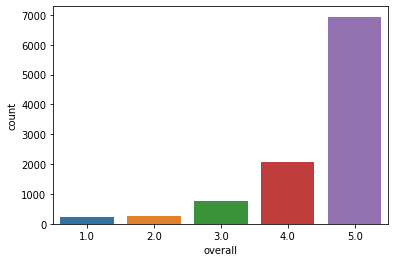

In [35]:
sns.countplot(df.overall)

In [36]:
def rating(overall):
    if (int(overall <= 3)):
        return 0
    else:
        return 1
        
df['rating'] = df['overall'].apply(rating)
df = df.drop(['overall'], axis = 1)
df.head()

,reviewText,rating
0,"Not much to write about here, but it does exac...",1
1,The product does exactly as it should and is q...,1
2,The primary job of this device is to block the...,1
3,Nice windscreen protects my MXL mic and preven...,1
4,This pop filter is great. It looks and perform...,1


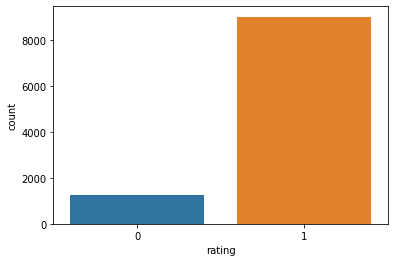

In [37]:
sns.countplot(df.rating)

## ___Text Pre-Processing___

In [40]:
import spacy
from sklearn.model_selection import train_test_split
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from string import punctuation
import collections
from collections import Counter

nlp = spacy.load("en_core_web_sm")
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

def furnished(text):
    final_text = []
    for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)
            
df.reviewText = df.reviewText.apply(furnished)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


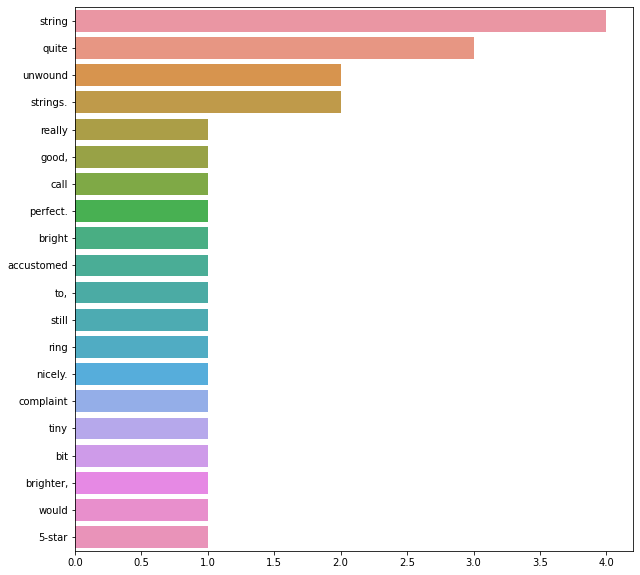

In [41]:
from collections import Counter

for i in df.reviewText:
    global text
    text = i.split()
    
counter=Counter(text)
most=counter.most_common()

x, y= [], []
for word,count in most[:20]:
    if (word not in stop):
        x.append(word)
        y.append(count)
plt.figure(figsize = (10,10))     
sns.barplot(x=y,y=x)

## ___Modelling___

In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

In [45]:
x_train,x_test,y_train,y_test = train_test_split(df.reviewText,df.rating,test_size = 0.2 , random_state = 0)

In [46]:
#bow
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
bow_x_train = cv.fit_transform(x_train)
bow_x_test = cv.transform(x_test)

print('bow_x_train:',bow_x_train.shape)
print('bow_x_test:',bow_x_test.shape)

bow_x_train: (8208, 559360)
bow_x_test: (2053, 559360)


In [47]:
#tf-idf 
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))

tfidf_x_train =tv.fit_transform(x_train)
tfidf_x_test =tv.transform(x_test)

print('tfidf_x_train:',tfidf_x_train.shape)
print('tfidf_x_test:',tfidf_x_test.shape)

tfidf_x_train: (8208, 559360)
tfidf_x_test: (2053, 559360)


### ___Naive Bayes___

In [48]:
# Naive Bayes

nb = MultinomialNB()

#fit
bow = nb.fit(bow_x_train, y_train)
tfidf = nb.fit(tfidf_x_train, y_train)

#predict
bow_predict = nb.predict(bow_x_test)
tfidf_predict = nb.predict(tfidf_x_test)

#accuracy
nb_bow = accuracy_score(y_test, bow_predict)
nb_tfidf = accuracy_score(y_test,tfidf_predict)

print('nb bow accuracy:', nb_bow)
print('tfidf accuracy:', nb_tfidf)

nb bow accuracy: 0.8899171943497322
tfidf accuracy: 0.8894301022893327


### ___Random Forest___

In [49]:
# Random Forest

rf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)

#fit
bow = rf.fit(bow_x_train, y_train)
tfidf = rf.fit(tfidf_x_train, y_train)

#predict
bow_predict = rf.predict(bow_x_test)
tfidf_predict = rf.predict(tfidf_x_test)

#accuracy
rf_bow = accuracy_score(y_test, bow_predict)
rf_tfidf = accuracy_score(y_test,tfidf_predict)

print('rf bow accuracy:', rf_bow)
print('rf tfidf accuracy:', rf_tfidf)

rf bow accuracy: 0.8889430102289333
rf tfidf accuracy: 0.8889430102289333


### ___Linear SVC___

In [50]:
# Linear SVC
ls =  LinearSVC()

#fit
bow = ls.fit(bow_x_train, y_train)
tfidf = ls.fit(tfidf_x_train, y_train)

#predict
bow_predict = ls.predict(bow_x_test)
tfidf_predict = ls.predict(tfidf_x_test)

#accuracy
ls_bow = accuracy_score(y_test, bow_predict)
ls_tfidf = accuracy_score(y_test,tfidf_predict)

print('ls bow accuracy:', ls_bow)
print('ls tfidf accuracy:', ls_tfidf)

ls bow accuracy: 0.887481734047735
ls tfidf accuracy: 0.8899171943497322


### ___Logistic Regression___

In [51]:
# Logistic Regression

lr = LogisticRegression(random_state=0)

#fit
bow = lr.fit(bow_x_train, y_train)
tfidf = lr.fit(tfidf_x_train, y_train)

#predict
bow_predict = lr.predict(bow_x_test)
tfidf_predict = lr.predict(tfidf_x_test)

#accuracy
lr_bow = accuracy_score(y_test, bow_predict)
lr_tfidf = accuracy_score(y_test,tfidf_predict)

print('lr bow accuracy:', lr_bow)
print('lr tfidf accuracy:', lr_tfidf)

lr bow accuracy: 0.8899171943497322
lr tfidf accuracy: 0.8889430102289333


In [52]:
scores = {'accuracy': [nb_bow * 100, nb_tfidf * 100, rf_bow * 100, rf_tfidf * 100, lr_bow * 100, lr_tfidf * 100, ls_tfidf * 100, ls_bow * 100],
                   'model': ['naive bayes bow', 'naive bayes tfidf', 'random forest bow', 'random forest tfidf', 'logit bow', 'logit tfidf', 'SVM bow', 'SVM tfidf']}

scores_df = pd.DataFrame(scores, columns = ['accuracy', 'model'])
scores_df

,accuracy,model
0,88.991719,naive bayes bow
1,88.943010,naive bayes tfidf
2,88.894301,random forest bow
3,88.894301,random forest tfidf
4,88.991719,logit bow
5,88.894301,logit tfidf
6,88.991719,SVM bow
7,88.748173,SVM tfidf


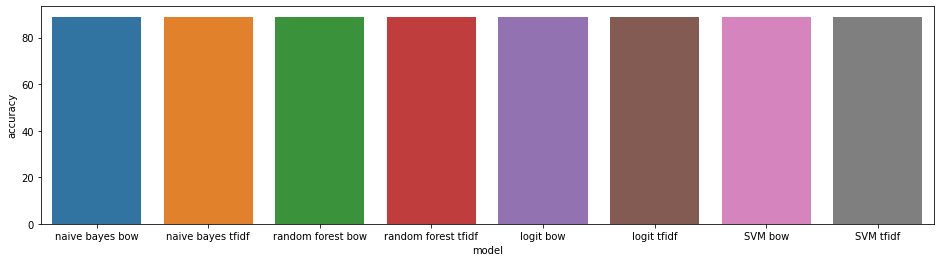

In [56]:
plt.figure(figsize = (16,4))
sns.barplot(y = scores_df.accuracy, x = scores_df.model)